## We import necessary  library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the file to view the data inside it

In [2]:
df = pd.read_excel("ana.xlsx", parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [4]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


## Data Wrangling

## Ensure that the data is clean and that there is no missing or incorrect data. 

In [6]:
df['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [7]:
df['Time'] = df['Time'].str.replace(' ','')

In [8]:
df['Time'].unique()

array(['Morning', 'Afternoon', 'Evening'], dtype=object)

In [9]:
df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [10]:
df['State'] = df['State'].str.replace(' ','')

In [11]:
df['State'].unique()

array(['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS'], dtype=object)

In [12]:
df['Group'].unique()

array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object)

In [13]:
df['Group'] = df['Group'].str.replace(' ','')

In [14]:
df['Group'].unique()

array(['Kids', 'Men', 'Women', 'Seniors'], dtype=object)

## Data Analysis

## 1_Perform descriptive statistical analysis on the data 

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the data (X) to the [0, 1] range
df[["SalesNorm","UnitNorm"]] = scaler.fit_transform(df[["Sales","Unit"]].to_numpy())
print(df)

           Date       Time State    Group  Unit  Sales  SalesNorm  UnitNorm
0    2020-10-01    Morning    WA     Kids     8  20000   0.095238  0.095238
1    2020-10-01    Morning    WA      Men     8  20000   0.095238  0.095238
2    2020-10-01    Morning    WA    Women     4  10000   0.031746  0.031746
3    2020-10-01    Morning    WA  Seniors    15  37500   0.206349  0.206349
4    2020-10-01  Afternoon    WA     Kids     3   7500   0.015873  0.015873
...         ...        ...   ...      ...   ...    ...        ...       ...
7555 2020-12-30  Afternoon   TAS  Seniors    14  35000   0.190476  0.190476
7556 2020-12-30    Evening   TAS     Kids    15  37500   0.206349  0.206349
7557 2020-12-30    Evening   TAS      Men    15  37500   0.206349  0.206349
7558 2020-12-30    Evening   TAS    Women    11  27500   0.142857  0.142857
7559 2020-12-30    Evening   TAS  Seniors    13  32500   0.174603  0.174603

[7560 rows x 8 columns]


In [16]:
df.describe()

,Unit,Sales,SalesNorm,UnitNorm
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


In [17]:
(df.SalesNorm.mode(), df.Sales.mode())

(0    0.111111
 Name: SalesNorm, dtype: float64,
 0    22500
 Name: Sales, dtype: int64)

In [18]:
(df.UnitNorm.mode(), df.Unit.mode())

(0    0.111111
 Name: UnitNorm, dtype: float64,
 0    9
 Name: Unit, dtype: int64)

## 2_Determine which group the highest sales, and which is the lowest sales

In [27]:
Max_sales=df.groupby("Sales")

In [28]:
sales_group = Max_sales['Sales','Group'].max()
print(f"The highest sales is {sales_group.max()}")
print(f"The lowest sales is {sales_group.min()}")

The highest sales is Sales    162500
Group     Women
dtype: object
The lowest sales is Sales    5000
Group     Men
dtype: object


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9784\1986186122.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_group = Max_sales['Sales','Group'].max()


## 3_Determine which state is the highest sales, and which is the lowest sales.

In [29]:
sales_state = Max_sales['Sales','State'].max()
print(f"The highest sales is {sales_state.max()}")
print(f"The lowest sales is {sales_state.min()}")

The highest sales is Sales    162500
State        WA
dtype: object
The lowest sales is Sales    5000
State      SA
dtype: object


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9784\2587944993.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_state = Max_sales['Sales','State'].max()


## 4_ Weekly, monthly and quarterly reports for the analysis made.

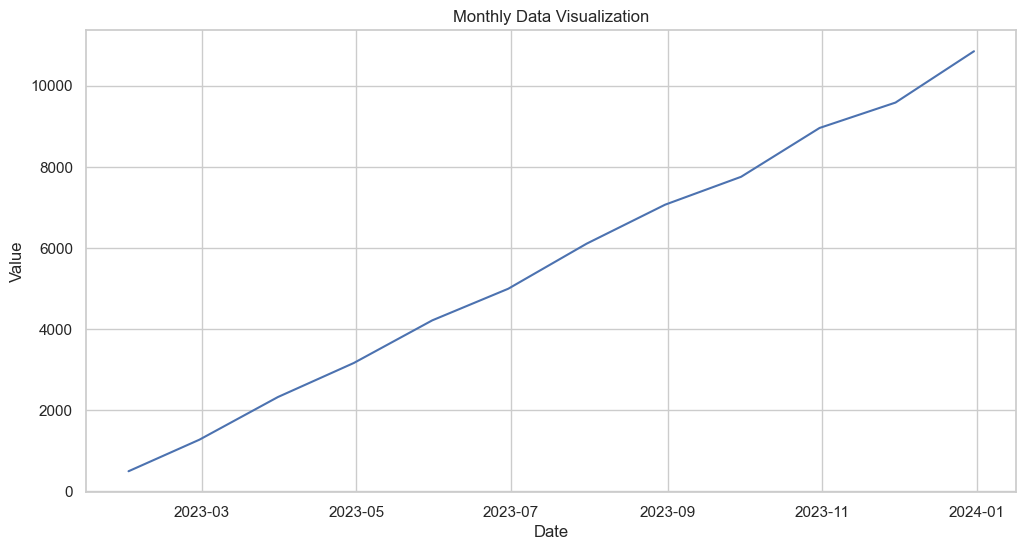

In [23]:
an = pd.DataFrame({'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
                     'Value': [i for i in range(1, 366)]})
an.set_index('Date', inplace=True)
monthly_data = an.resample('M').sum()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y="Value")
plt.title("Monthly Data Visualization")
plt.show()

## Data Visualization

## 1_State-wise sales analysis 

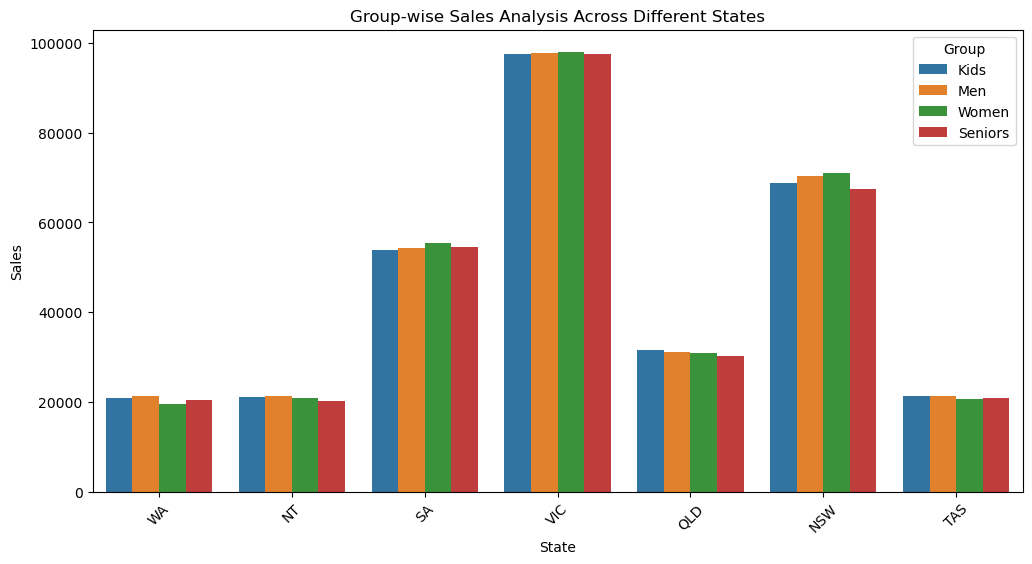

In [22]:
# Create a bar plot to visualize group-wise sales analysis across different states
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df, ci=None)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Group')
plt.show()

## 2_Group-wise sales analysis 

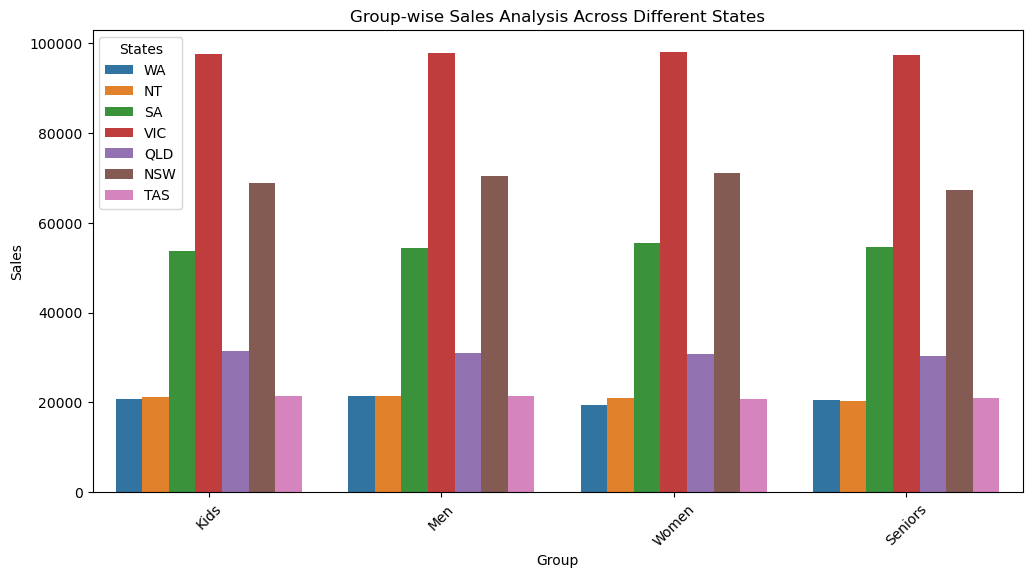

In [21]:
# Create a bar plot to visualize group-wise sales analysis across different states
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df, ci=None)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='States')
plt.show()


## 3 _Time of the day analysis

<AxesSubplot:xlabel='Time'>

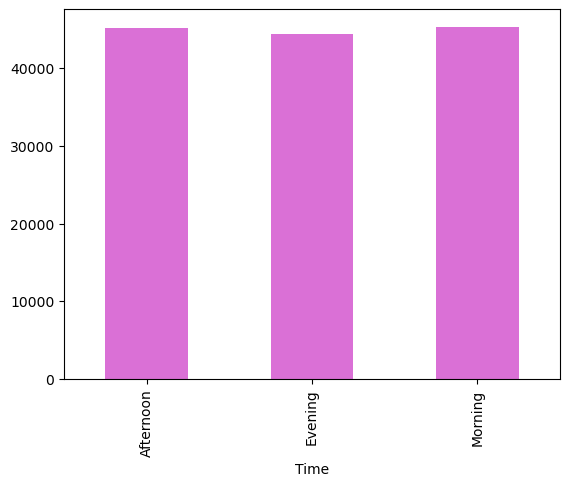

In [20]:
df.groupby("Time")["Sales"].mean().plot(kind = 'bar', color = ['orchid'])

## Thank you